Este script nos sirve para evaluar el rendimiento de nuestro tracking con Deeplabcut. Recibe archivos 'h5' generados del analisis de videos por nuestro modelo. Genera un histograma de las likelihoods del tracking para cada keypoint (para el video seleccionado). Luego, se puede correr el script 'DLC_likelihood_hist.py' para realizar este analisis sobre todos los videos analizados. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

n_keypoints = 5
folder = r'D:\Datos G. omarorum\Fish1\Objeto\Trial 1 y 2\pose-estimation' #indicar la ruta a la carpeta con los archivos h5
os.chdir(folder)
files = sorted(glob.glob('*.h5'))

In [3]:
track = pd.read_hdf(files[0]) #cambiar por el indice del video que se quiere analizar
track

scorer    DLC_resnet50_GymnotusDec19shuffle1_200000                         \
bodyparts                                     mouth                          
coords                                            x           y likelihood   
0                                        444.013733  194.215759   0.999985   
1                                        444.048981  194.197784   0.999985   
2                                        444.106415  194.290375   0.999985   
3                                        444.094696  194.317673   0.999985   
4                                        444.065186  194.323334   0.999985   
...                                             ...         ...        ...   
60087                                    446.917877  195.288010   0.999979   
60088                                    446.911041  195.288071   0.999979   
60089                                    446.899628  195.300339   0.999979   
60090                                    446.910767  195.274994   0.999979   
60091                                    446.915009  195.312210   0.999979   

scorer                                                                \
bodyparts        head                              body1               
coords              x           y likelihood           x           y   
0          443.353699  188.363541   0.999742  444.207214  136.756424   
1          443.369904  188.321289   0.999756  444.124725  136.848633   
2          443.383179  188.395142   0.999757  444.126160  136.834427   
3          443.364655  188.475815   0.999762  444.081207  136.930771   
4          443.321594  188.513275   0.999759  444.071014  136.865097   
...               ...         ...        ...         ...         ...   
60087      445.491730  189.123169   0.999784  444.306213  137.724869   
60088      445.476166  189.128891   0.999786  444.321564  137.665070   
60089      445.477142  189.135651   0.999786  444.327179  137.699966   
60090      445.483185  189.115738   0.999782  444.299652  137.686569   
60091      445.464020  189.134338   0.999781  444.267700  137.525314   

scorer                                                                         \
bodyparts                  body2                              tail              
coords    likelihood           x          y likelihood           x          y   
0           0.978704  445.149445  81.931305   0.999882  451.318207  51.414234   
1           0.978427  444.760376  81.840324   0.999913  450.695282  52.757751   
2           0.978904  444.640503  81.749489   0.999913  450.726959  52.305740   
3           0.979280  444.598572  81.797256   0.999910  450.756287  52.210361   
4           0.979049  444.583679  81.725426   0.999914  450.706055  52.484444   
...              ...         ...        ...        ...         ...        ...   
60087       0.980136  444.052734  81.939728   0.999916  447.777039  55.857193   
60088       0.979943  444.067841  81.919716   0.999916  447.781769  55.831230   
60089       0.980487  444.080872  81.913414   0.999916  447.776581  55.792503   
60090       0.980604  444.101349  81.878845   0.999916  447.762543  55.782738   
60091       0.979990  444.122528  81.722038   0.999922  447.719269  55.695107   

scorer                
bodyparts             
coords    likelihood  
0           0.993841  
1           0.994732  
2           0.993991  
3           0.993845  
4           0.994136  
...              ...  
60087       0.995950  
60088       0.995989  
60089       0.996131  
60090       0.996134  
60091       0.996296  

[60092 rows x 15 columns]

La siguiente celda extrae los valores de likelihood para cada keypoint y cada frame. Genera el DataFrame 'Likelihoods' donde se guarda esta informacion. 

In [4]:
likelihoods = np.zeros(shape=(len(track), n_keypoints))

for i in range(n_keypoints):
    likelihoods[:,i] = (track[track.columns.get_level_values(0)[0],track.columns.get_level_values(1).unique()[i], 'likelihood'])

likelihoods = pd.DataFrame(likelihoods, columns=track.columns.get_level_values(1).unique())
likelihoods

bodyparts,mouth,head,body1,body2,tail
0,0.999985,0.999742,0.978704,0.999882,0.993841
1,0.999985,0.999756,0.978427,0.999913,0.994732
2,0.999985,0.999757,0.978904,0.999913,0.993991
3,0.999985,0.999762,0.979280,0.999910,0.993845
4,0.999985,0.999759,0.979049,0.999914,0.994136
...,...,...,...,...,...
60087,0.999979,0.999784,0.980136,0.999916,0.995950
60088,0.999979,0.999786,0.979943,0.999916,0.995989
60089,0.999979,0.999786,0.980487,0.999916,0.996131
60090,0.999979,0.999782,0.980604,0.999916,0.996134


La siguiente celda grafica las likelihoods para cada keypoint. 

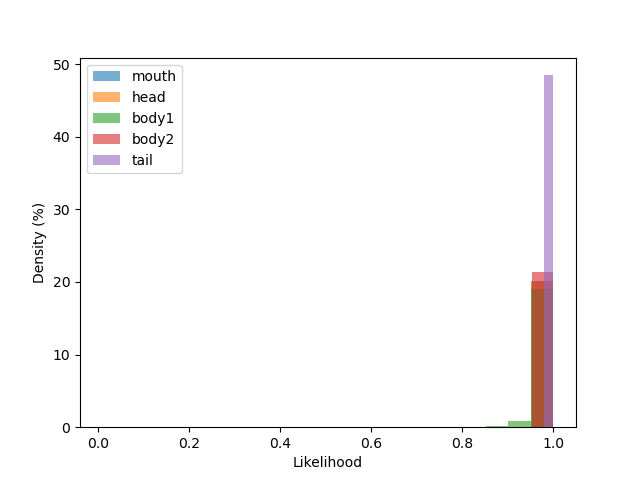

In [11]:
%matplotlib widget 
#esta linea nos permitira interactuar con la grafica, por ejemplo, hacer zoom
fig, ax = plt.subplots()
for i in range(n_keypoints):
    plt.hist(likelihoods.iloc[:,i], bins= 20, alpha=.6, density=True, label=track.columns.get_level_values(1).unique()[i])

ax.set_xlabel('Likelihood')
ax.set_ylabel('Density (%)')
ax.legend()